# Polynomial Regression


Below, you can find data from 10 different temperature and pressure sensors. We will attempt to determine the relationship between temperature (T) and pressure (P).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data={
     'sensor_1':{'T':0,'P':0.0002},
     'sensor_2':{'T':20,'P':0.0012},
     'sensor_3':{'T':40,'P':0.0060},
     'sensor_4':{'T':60,'P':0.0300},
     'sensor_5':{'T':80,'P':0.0900},
     'sensor_6':{'T':100,'P':0.2700},
     'sensor_7':{'T':120,'P':8.1},
     'sensor_8':{'T':140,'P':27},
     'sensor_9':{'T':160,'P':81},
     'sensor_10':{'T':180,'P':122},
     }
data=pd.DataFrame.from_dict(data,orient='index')

First, we'll try to capture the relationship between these two variables with the simple linear regression process we've seen before.

In [3]:
X = data.iloc[:, 0:1].values 
y = data.iloc[:, 1].values 

In [4]:
# Fitting Linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
lin = LinearRegression() 

lin.fit(X,y); 

Let's take a look at the result of the LinearRegression model

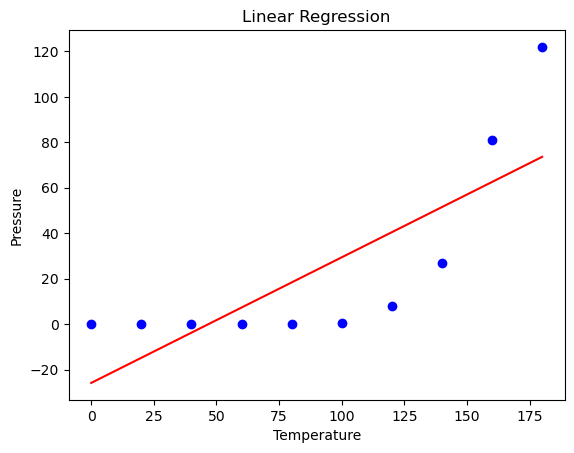

In [5]:
# Visualising the Linear Regression results 
plt.scatter(X, y, color = 'blue') 

plt.plot(X, lin.predict(X), color = 'red') 
plt.title('Linear Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 

plt.show() 

It is pretty obvious that a straight line can not capture the trend here. Now, let's try a Polynomial Regression model

First we are going to create X_poly using PolynomialFeatures and then feed the transformed X to the Linear Regression model.

Using Polynomial Features creates new columns with every exponent of X up to the specified degree.

So for degree = 3, we will get a new, transformed X with columns corresponding to $X^0, X^1, X^2, X^3$

Note that if we had more features in our X, we would also get linear combinations of those features. For example, if we had two features $A$ and $B$, and degree 3, we would see single exponents up to  $A^3$ and $B^3$, but also combinations like $A^2B$ and $B^2A$ (up to a maximum TOTAL degree of 3)

In [38]:
# Fitting Polynomial Regression to the dataset 
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X) 

In [39]:
# Just X^1 - 1 column
X.shape

(10, 1)

In [40]:
# X^0, X^1, X^2, X^3 - 4 columns
X_poly.shape

(10, 4)

In [41]:
lin2 = LinearRegression() 
lin2.fit(X_poly, y); 

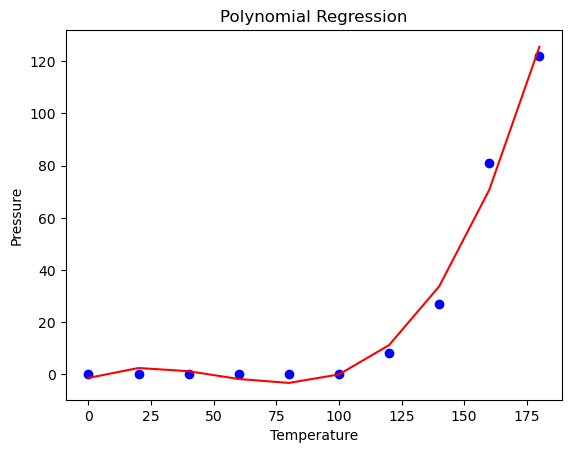

In [42]:
# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Temperature') 
plt.ylabel('Pressure') 
  
plt.show() 

Here, we can see that Polynomial Regression can successfully capture non-linear trends, even though the underlying regression function is still linear - because we engineered non-linear features!

But what if we change the degree parameter in the PolynomialFeatures function?

> #### Exercise
> Repeat the above steps, but modify the degree value and observe the outcomes. What issue will we encounter if we increase the degree parameter?
>
>HINT: Is the actual physical process that generated this data really better explained by a higher degree function? Or does a higher degree function just have more complexity to match noise in the training data? In ML modelling terms, what does this mean?